# Titanic Machine Learning Competition

A simple solution to the Kaggle Titanic Competition:

"*Use the Titanic passenger data (name, age, price of ticket, etc) to try to predict who will survive and who will die*"


## Set Up

In [4]:
# Data Analysis
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
from matplotlib import pyplot as plt

#Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# ML Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Tuning
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV 


#Filter unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# set seed for reproducibility
np.random.seed(0)

In [5]:
#import csv into pd - training data
train_data = pd.read_csv('train.csv')

#import csv into pd - test data
test_data = pd.read_csv('test.csv')
test_data2 = pd.read_csv('test.csv') #control purposes

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Concat both sets together for 

# Project Planning

**1. Data Exploration**

- Understand nature of data (.describe(), .info(), value counts)
- Histograms and boxplots

**2. Exploratory Data Analysis**

- Correlation between feautres
- Feature engineering

**3. Data Preprocessing**

- Data cleaning
     - Imputing data
     - Dropping Null values

**4. ML Modelling**
- Model Building

## 1. Data Exploration

In [4]:
#Shapes of the dataset
print("Training data : ", train_data.shape)
print("Test data : ",  test_data.shape)

Training data :  (891, 12)
Test data :  (418, 11)


**Notes**
- Train data has one more column - Survived

In [5]:
#looking for numerical or caterogrical data
train_data.info()
#sum all null values
train_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#looking for numerical or caterogrical data
test_data.info()
#sum all null values
test_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Notes**
- Both numerical and catergorical data types:

    - **Numerical** (numerical values) : PassengerId, Age, SibSp, Parch, Fare
    - **Catergorical** (discrete labelled groups) : Survived, Pclass, Sex, Ticket, Cabin, Embarked
    
- Cabin, Age have significant missing values, Embarked has only 2 values missing and 1 Fare in test data. Embarked can be dropped and Fare and Age can be imputed.

- PassengerId is just a count, no pattern, dropped

In [7]:
#describe numerical data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#describe categorical data
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bourke, Miss. Mary",male,CA. 2343,G6,S
freq,1,577,7,4,644


**Note**

- Lots of Ticket and Cabin duplicates

**Continous or Discrete?**

In [24]:
numerical=[features for features in train_data.columns if train_data[features].dtypes!='O']
numerical.remove('PassengerId')
numerical

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [25]:
discrete=[feature for feature in numerical if len(train_data[feature].unique())<25] #less than 25 unique values
discrete

['Survived', 'Pclass', 'SibSp', 'Parch']

In [26]:
continous=[feature for feature in numerical if feature not in discrete]
continous

['Age', 'Fare']

In [27]:
categorical = [feature for feature in train_data.columns if feature not in numerical]
categorical.remove('PassengerId')
categorical

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [28]:
categorical = categorical + discrete
categorical

['Name',
 'Sex',
 'Ticket',
 'Cabin',
 'Embarked',
 'Survived',
 'Pclass',
 'SibSp',
 'Parch']

#### Numerical Analysis

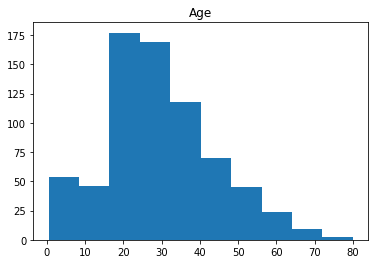

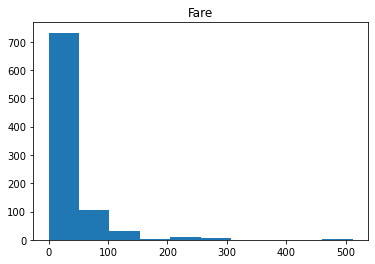

In [22]:
#For loop to print histograms for numerical data
for i in continous:
    plt.hist(train_data[i])
    plt.title(i)
    plt.show()

From the histograms we can observe both Parch, SibSp and Fare are heavily **right skewed** while Age seems relatively normal. Parch, SibSp and Fare to be normalised.

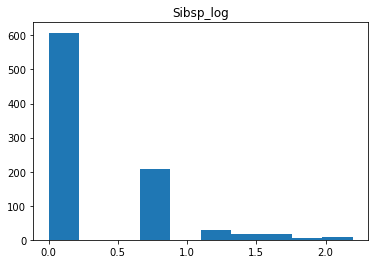

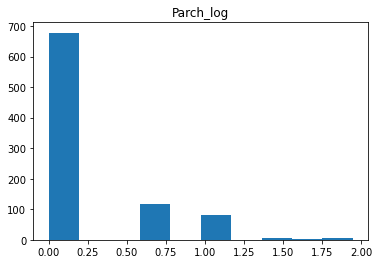

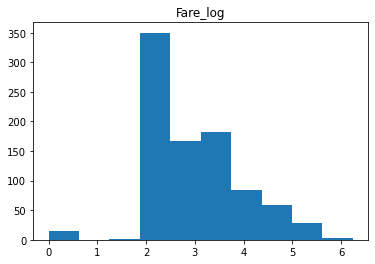

In [10]:
train_data['Fare_log'] = np.log(train_data.Fare+1)
plt.hist(train_data['Fare_log'])
plt.title('Fare_log')
plt.show()

**Note**

Fare normalised with a log function, unable to make normal Parch or Sibsp

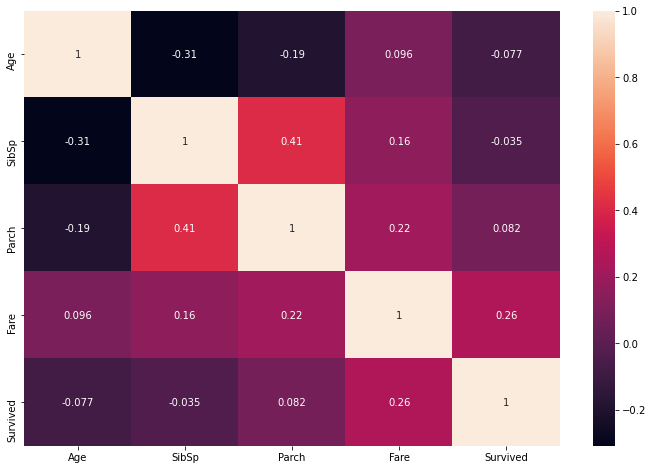

In [11]:
#add survival to list
numerical.append('Survived')

plt.subplots(figsize=(12,8))
sns.heatmap(train_data[numerical].corr(), annot=True)
plt.show()

**Observations**

Age seems to have moderate **negative correlation** Parch and SibSp : Older people tend to travel alone?

High **positive correlation** between Parch and SibSp : Families tend to travel together?


In [12]:
age = pd.cut(train_data['Age'], [0, 18, 80])
display(pd.pivot_table(train_data, index=age, values = 'Survived').style.background_gradient(cmap='Reds'))

,Survived
Age,
"(0, 18]",0.503597
"(18, 80]",0.382609


When seperating age into 2 categories (children and adult), children seemed to have a higher survival rate

#### Categorical Analysis

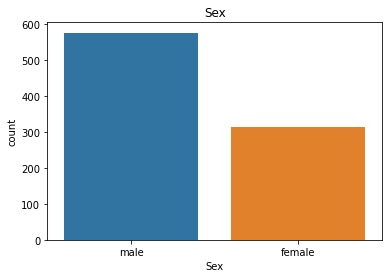

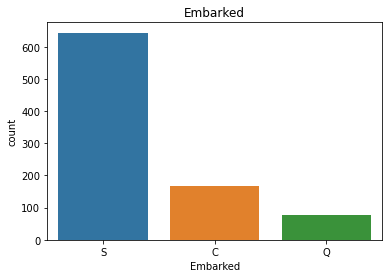

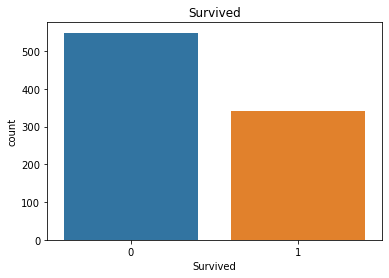

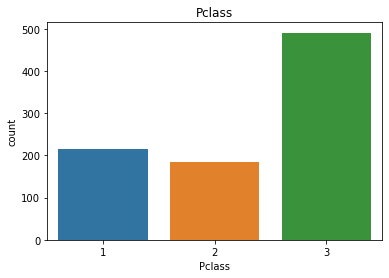

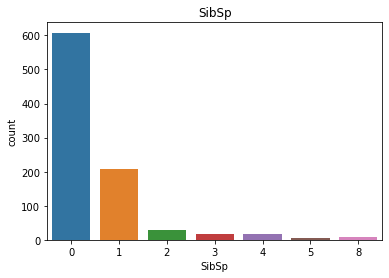

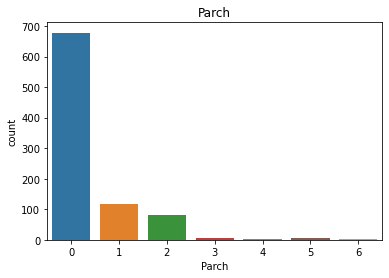

In [29]:
categorical.remove('Ticket')
categorical.remove('Cabin')
categorical.remove('Name')
#Left out, gets messy

#Easy way of doing count bar charts
for i in categorical:
    sns.countplot(train_data[i], data=train_data).set_title(i)
    plt.show()

In [30]:
for i in categorical:
    if i != 'Survived':
        display(pd.pivot_table(train_data, index=train_data[i], values ='Survived').style.background_gradient(cmap='Reds'))

,Survived
Sex,
female,0.742038
male,0.188908


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


**Observations**

From the charts we can see depsite there being a higher male population on the chart, a higher proportion of females survived.

Passengers from Pclass 1 have also a much higher chance of survival.

Passengers that embarked at C had the highest chance of survival.

In [31]:
train_data.pivot_table('Survived', ['Embarked','Sex'] , 'Pclass').style.background_gradient(cmap='Reds')

## 2. Exploratory Data Analysis

We will first begin with **Cabins**

We will investigate if the letter at the front of the Cabins affect survival.

In [16]:
#Extract first letter from cabin
train_data['Cabin_letter'] = train_data.Cabin.str.extract('([a-zA-Z])')

In [17]:
train_data['Cabin_letter'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_letter, dtype: int64

In [18]:
 display(pd.pivot_table(train_data, index=train_data['Cabin_letter'], values ='Survived').style.background_gradient(cmap='Reds'))

,Survived
Cabin_letter,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000


**Observations**

We can see some cabins have higher rates of survival than others.

Moving onto **Tickets**.

We will see if the letters and numbers in the Tickets effect anything.

In [19]:
#Extract all letters in ticket
train_data['Ticket_letter'] = train_data.Ticket.str.extract('([a-zA-Z]+)')

#new column to mark if ticket is number or has letters in it
train_data['isNumeric'] = train_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

In [20]:
train_data['Ticket_letter'].value_counts()

PC       60
C        33
A        29
STON     18
SOTON    17
CA       14
S        14
SC       13
W        11
F         6
LINE      4
PP        3
P         2
WE        2
Fa        1
SW        1
SO        1
SCO       1
Name: Ticket_letter, dtype: int64

In [21]:
train_data['isNumeric'].value_counts()

1    661
0    230
Name: isNumeric, dtype: int64

In [22]:
 display(pd.pivot_table(train_data, index=train_data['Ticket_letter'], values ='Survived').style.background_gradient(cmap='Reds'))

,Survived
Ticket_letter,
A,0.068966
C,0.454545
CA,0.071429
F,0.666667
Fa,0.000000
LINE,0.250000
P,0.500000
PC,0.650000
PP,0.666667


In [23]:
 display(pd.pivot_table(train_data, index=train_data['isNumeric'], values ='Survived').style.background_gradient(cmap='Reds'))

,Survived
isNumeric,
0,0.382609
1,0.384266


**Observations**

No real difference between whether there is a letter in the Ticket - feature dropped.

There is a variance between Ticket letters.

Moving onto **Title** in passenger Names

In [24]:
#Extract title from {Name}, regex: extract alphanumeric characters after a comma ',' and before a period '.' , r = raw string

train_data['Title'] = train_data.Name.str.extract(r', (\w+)\.')

In [25]:
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Capt          1
Mme           1
Ms            1
Don           1
Jonkheer      1
Lady          1
Sir           1
Name: Title, dtype: int64

In [26]:
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', nan, 'Jonkheer'],
      dtype=object)

In [27]:
 display(pd.pivot_table(train_data, index=train_data['Title'], values ='Survived').style.background_gradient(cmap='Reds'))

,Survived
Title,
Capt,0.000000
Col,0.500000
Don,0.000000
Dr,0.428571
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.575000
Miss,0.697802


**Observations**

We can see a large variance in Title survival rates.

**Feature Engineering**

We will add 3 addition features: Titles, Ticket Letters and Cabin Letters

## Data Preprocessing

**Null Values**


In [28]:
#Dropped rows where {Embarked} is null in training data
train_data = train_data.dropna(subset=['Embarked'])

I'm not sure why but dropping this gives a higher accuracy.

In [29]:
#impute nulls for continuous data - numerical

#fill null age values with average age and of passengers and fare in both training and test data
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())

#use median as Fare distribution is not normal
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

In [31]:
#Code examples, not used

#Mapping
#embarkment = {'S': 0, 'C': 1, 'Q': 2}
#train_data['embarked_id'] = train_data['Embarked'].map(embarkment)
#test_data['embarked_id'] = train_data['Embarked'].map(embarkment)

#Ratio of men to women survival
Men = train_data[train_data['Sex'] == 'male']['Sex'].count()
survived_men = train_data[(train_data['Sex'] == 'male') & (train_data['Survived'] == 1)]['Sex'].count()
Women = train_data[train_data['Sex'] == 'female']['Sex'].count()
survived_women = train_data[(train_data['Sex'] == 'female') & (train_data['Survived'] == 1)]['Sex'].count()

print('The ratio of survived men : '+ '%' +str(round(100*survived_men / Men, 2)) )
print('The ratio of survived women : '+ '%' +str(round(100*survived_women / Women, 2)) )

The ratio of survived men : %18.89
The ratio of survived women : %74.04


In [ ]:
#replicate all features on training onto test

test_data['Title'] = test_data.Name.str.extract(r', (\w+)\.')
test_data['Ticket_letter'] = test_data.Ticket.str.extract('([a-zA-Z]+)')
test_data['Cabin_letter'] = test_data.Cabin.str.extract('([a-zA-Z])')
test_data['Fare_log'] = np.log(test_data.Fare+1)

Both test and training data sets must have same number of features.

**Data Scaling**

In [ ]:
train_data[['Age','SibSp','Parch','Fare_log']]= StandardScaler().fit_transform(train_data[['Age','SibSp','Parch','Fare_log']])
test_data[['Age','SibSp','Parch','Fare_log']]= StandardScaler().fit_transform(test_data[['Age','SibSp','Parch','Fare_log']])

Scaling numerical data.

In [ ]:
#Pclass should be categorical
train_data['Pclass'] = train_data['Pclass'].astype(str)
test_data['Pclass'] = test_data['Pclass'].astype(str)

train_data.fillna('None', inplace=True)
test_data.fillna('None', inplace=True)

encode=OneHotEncoder(handle_unknown='ignore')
train_data_final=encode.fit_transform(train_data[['Pclass','Sex','Age','SibSp','Parch',
                                     'Embarked','Fare_log', 'Cabin_letter', 'Ticket_letter', 'Title']])
test_data_final=encode.transform(test_data[['Pclass','Sex','Age','SibSp','Parch',
                                     'Embarked','Fare_log', 'Cabin_letter', 'Ticket_letter', 'Title']])

Encoding data with OHE over pd.get_dummies as it gave differing number of features between test and training data. Didn't want to manually fix feature lengths. 

Possible to use pd.get_dummies by concat both training and test sets, but that is bad practise.

In [ ]:
train_data_final

In [ ]:
test_data_final

In [ ]:
#Designate X and Y for ML Modelling

y = train_data['Survived']
X = train_data_final

In [ ]:
#run through several common algorithms, all default settings - still learning tuning performance

rForest = RandomForestClassifier()
rForest.fit(X, y)
rForest_score = round(rForest.score(X, y) * 100, 2)

dTree = DecisionTreeClassifier()
dTree.fit(X, y)
dTree_score = round(dTree.score(X, y) * 100, 2)

logReg = LogisticRegression()
logReg.fit(X, y)
logReg_score = round(logReg.score(X, y) * 100, 2)

KNC = KNeighborsClassifier()
KNC.fit(X, y)
KNC_score = round(KNC.score(X, y) * 100, 2)

result = pd.DataFrame({
    'Model': ['Random Forest','Decision Tree','LogisticRegression','K Neighbors Classifier'],
    'Score': [rForest_score, dTree_score, logReg_score, KNC_score]})
result

We will be proceeding with **Random Forest**.

**Best Parameters** - Ignore this part

In [ ]:
cv = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
model = RandomForestClassifier(random_state=1)
parameter = [{
    'n_estimators': [100, 350, 500],
    'min_samples_split': [6, 8, 10],
    'min_samples_leaf': [2, 4, 6]
}]
grid = GridSearchCV(model, param_grid = parameter, cv=cv, refit=True, verbose=1, n_jobs=-1)
grid.fit(X, y)
print(grid.best_estimator_)

In [ ]:
model = RandomForestClassifier(min_samples_leaf=2, min_samples_split=6,
                       n_estimators=350, random_state=1)
model.fit(X, y)

**Submission**

In [ ]:
#default settings seems to give the best result

test = rForest.predict(test_data_final)
submission = pd.DataFrame({
    'PassengerId': test_data2['PassengerId'],
    'Survived': test
})

submission.to_csv('submission.csv', index=False)

Final Accuracy : **79.904%**


Rank **545** as of *23/09/2021* (top 2%)